In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Imputer
import random
import seaborn as sns
from imports import categorical_encoder
from imports import dataframe_selector
from imports import categorical_imputer

In [12]:
# Importing the dataset]
dataset_b = pd.read_csv('dataset/train/train.csv')
train_dataset= dataset_b.copy()

In [13]:
dataset_b

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train_dataset

In [14]:
train_dataset.shape

(891, 12)

In [15]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Except for the Age column, rest of the numeric columns have no null values
#### We can get the idea of the skew by comparing the mean with median. Except for the Fare column, which seems to be twice the median, rest of the columns have a comparable mean & median or a 0 median(for 1/0 values or columns with mostly 0's)

In [17]:
train_dataset.columns[train_dataset.isnull().any()] ### Checking missing values in non numeric variables


Index(['Age', 'Cabin', 'Embarked'], dtype='object')

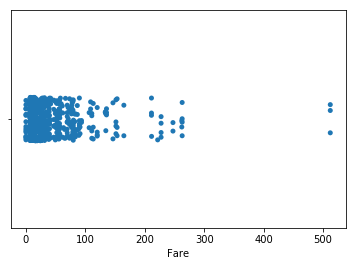

In [21]:
sns.stripplot(x=train_dataset['Fare'])

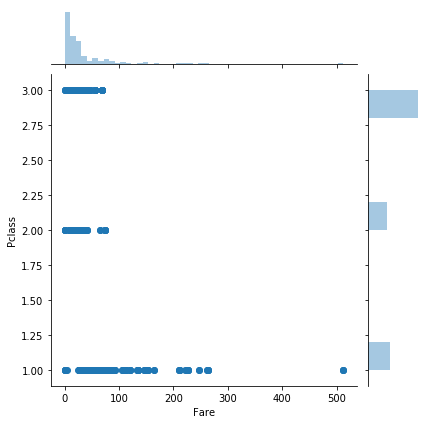

In [22]:
sns.jointplot(train_dataset['Fare'], train_dataset['Pclass'])

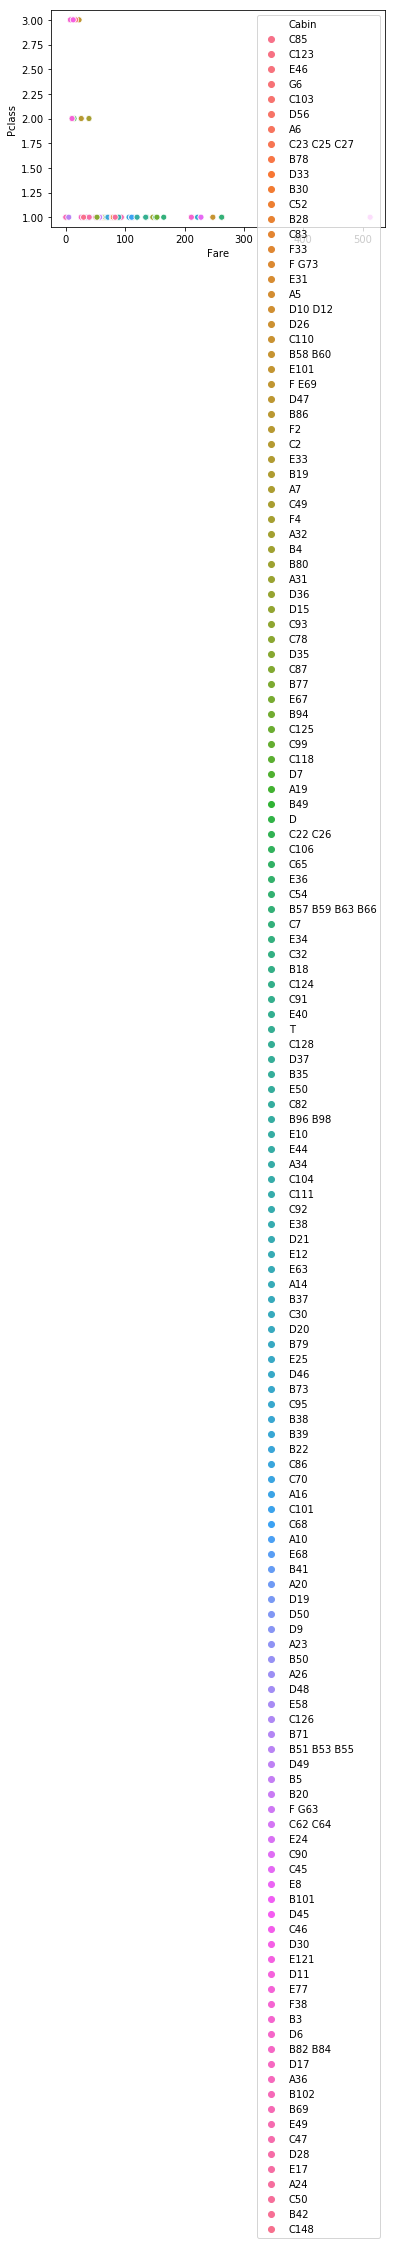

In [24]:
sns.scatterplot(x="Fare", y="Pclass", hue="Cabin",
...                      data=train_dataset)